In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('advertising.csv', delimiter=',')

In [3]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
# Check null value
data.isnull().sum()*100/data.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [6]:
import seaborn as sns

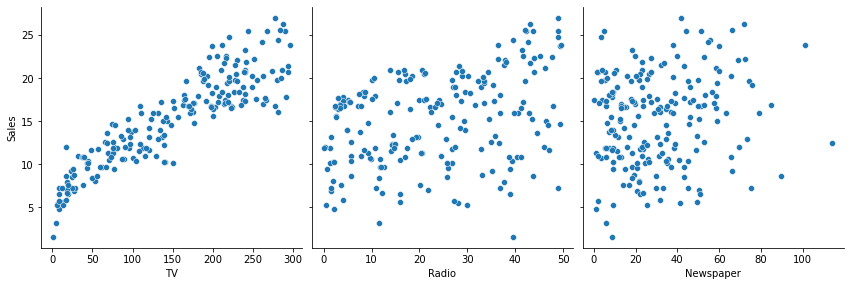

In [7]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

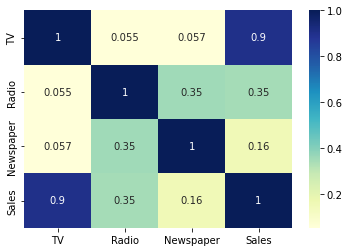

In [8]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [9]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2, random_state = 42)

In [11]:
X_train[:5, :3]
X_train.dtype

dtype('float64')

In [12]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [13]:
# Hyper-parameters
#input_size = 160
#output_size = 160
num_epochs = 60
learning_rate = 0.001

In [14]:
# data
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

In [15]:
X_train

tensor([[116.0000,   7.7000,  23.1000],
        [177.0000,   9.3000,   6.4000],
        [ 43.1000,  26.7000,  35.1000],
        [ 62.3000,  12.6000,  18.3000],
        [224.0000,   2.4000,  15.6000],
        [ 38.2000,   3.7000,  13.8000],
        [ 70.6000,  16.0000,  40.8000],
        [147.3000,  23.9000,  19.1000],
        [104.6000,   5.7000,  34.4000],
        [ 76.3000,  27.5000,  16.0000],
        [ 78.2000,  46.8000,  34.5000],
        [168.4000,   7.1000,  12.8000],
        [  8.7000,  48.9000,  75.0000],
        [  7.8000,  38.9000,  50.6000],
        [ 76.4000,   0.8000,  14.8000],
        [129.4000,   5.7000,  31.3000],
        [ 73.4000,  17.0000,  12.9000],
        [289.7000,  42.3000,  51.2000],
        [ 19.6000,  20.1000,  17.0000],
        [197.6000,   3.5000,   5.9000],
        [284.3000,  10.6000,   6.4000],
        [184.9000,  21.0000,  22.0000],
        [112.9000,  17.4000,  38.6000],
        [ 23.8000,  35.1000,  65.9000],
        [290.7000,   4.1000,   8.5000],


In [16]:
from torch.utils.data import TensorDataset

In [17]:
train_ds = TensorDataset(X_train, y_train)
train_ds[0:3]

#Data loader
from torch.utils.data import DataLoader
# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [29]:
# Define linear model
model = nn.Linear(3, 1)
print(model.weight)
print(model.bias)
print("="*50)

# Parameters
list(model.parameters())
# Define Loss
import torch.nn.functional as F
loss_fn = F.mse_loss
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

#Parameters
num_epochs = 100
model = model
loss_fn = criterion
opt = optimizer
train_dl = train_dl
train_loss = []
for epoch in range(num_epochs):
    # Train with batches of data
    for xb,yb in train_dl:
        # 1. Generate predictions
        pred = model(xb)
            
        # 2. Calculate loss
        loss = loss_fn(pred, yb)
            
        # 3. Compute gradients
        loss.backward()
            
        # 4. Update parameters using gradients
        opt.step()
            
        # 5. Reset the gradients to zero
        opt.zero_grad()
        #train_loss.append(loss.item())
    # Print the progress
    if (epoch+1) % 10 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
        train_loss.append(loss.item())

Parameter containing:
tensor([[ 0.3894,  0.3805, -0.2006]], requires_grad=True)
Parameter containing:
tensor([-0.1379], requires_grad=True)
Epoch [10/100], Loss: 34.3108
Epoch [20/100], Loss: 73.8559
Epoch [30/100], Loss: 52.4976
Epoch [40/100], Loss: 67.9922
Epoch [50/100], Loss: 35.7669
Epoch [60/100], Loss: 28.4630


/opt/homebrew/Caskroom/miniforge/base/envs/pytorch/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [70/100], Loss: 16.8453
Epoch [80/100], Loss: 37.6268
Epoch [90/100], Loss: 27.1215
Epoch [100/100], Loss: 24.0163


In [49]:
#Predicting for X_test
y_pred_test = model(X_test)
#Converting predictions from tensor objects into a list
y_pred_test = [y_pred_test[x].item() for x in range(len(y_pred_test))]
# Comparing Actual and predicted values
df = {}
df['Actual Observation'] = y_test
df['Predicted Sales'] = y_pred_test
df = pd.DataFrame(df)
df

,Actual Observation,Predicted Sales
0,16.900000,18.626192
1,22.400000,22.795147
2,21.400000,24.439356
3,7.300000,10.278027
4,24.700001,19.774391
5,12.600000,14.212005
6,22.299999,21.043901
7,8.400000,6.177844
8,16.500000,14.049383
9,16.100000,15.953973


In [31]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred_test))

3.183526652459134

In [47]:
test_loss = nn.MSELoss()
test_loss(y_test, y_pred_test)
test_loss

AttributeError: 'list' object has no attribute 'size'

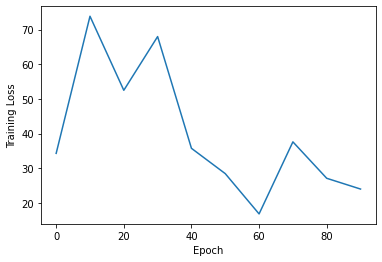

In [40]:
epochs = [i for i in range(0,100, 10)]
plt.plot(epochs,train_loss)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()

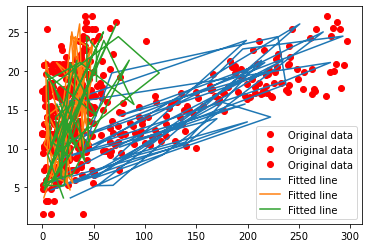

In [41]:
plt.plot(X_train, y_train, 'ro', label='Original data')
plt.plot(X_test, y_pred_test, label='Fitted line')
plt.legend()
plt.show()